<a href="https://colab.research.google.com/github/sujalkumeriya59/Machine-Learning/blob/main/Pract_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


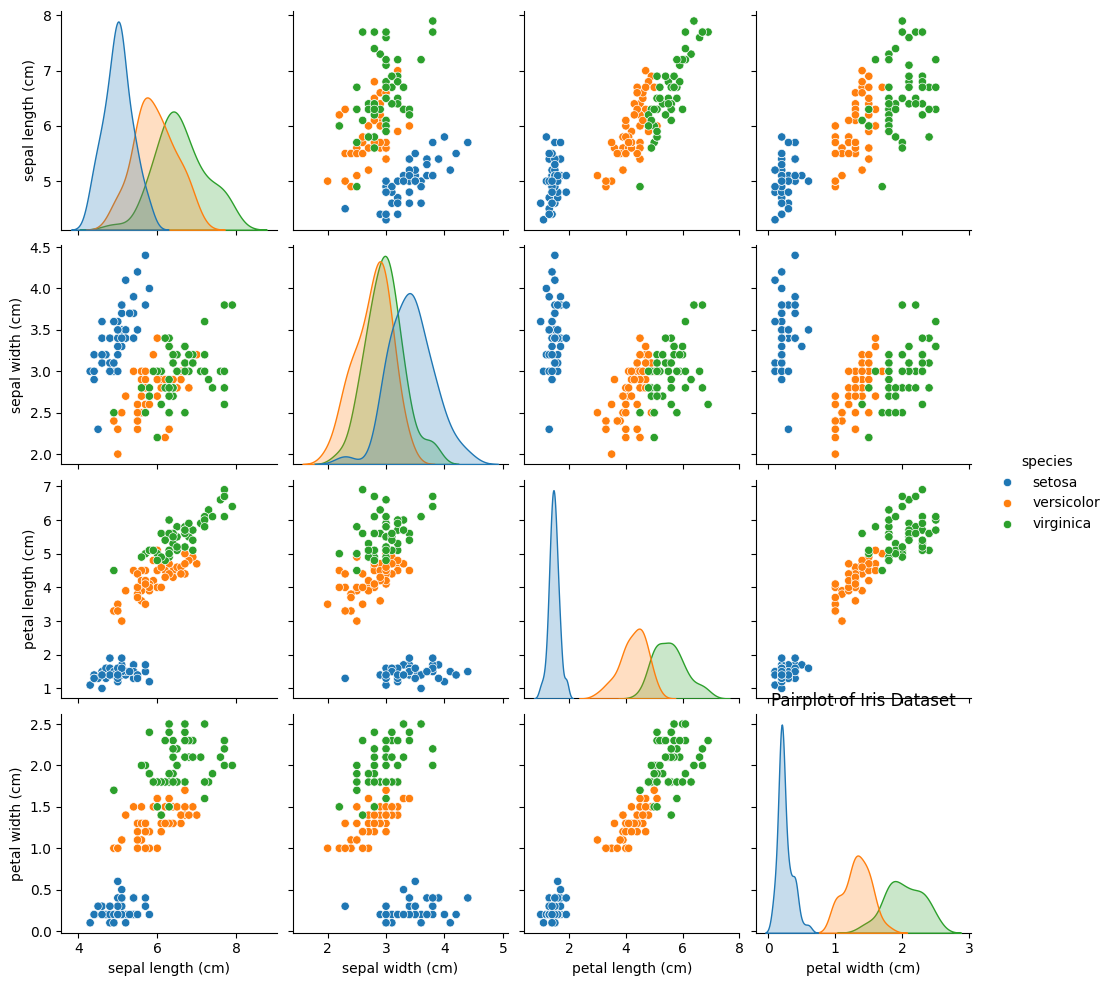

Training data shape: (120, 4)
Testing data shape: (30, 4)


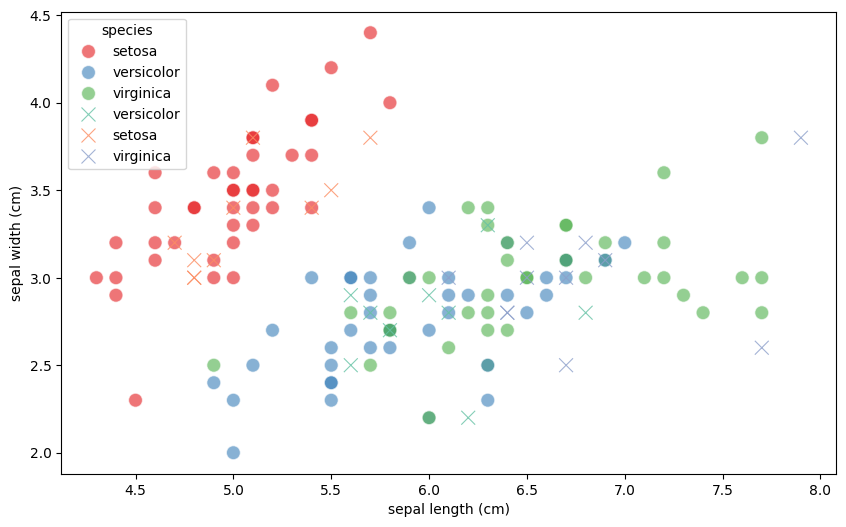

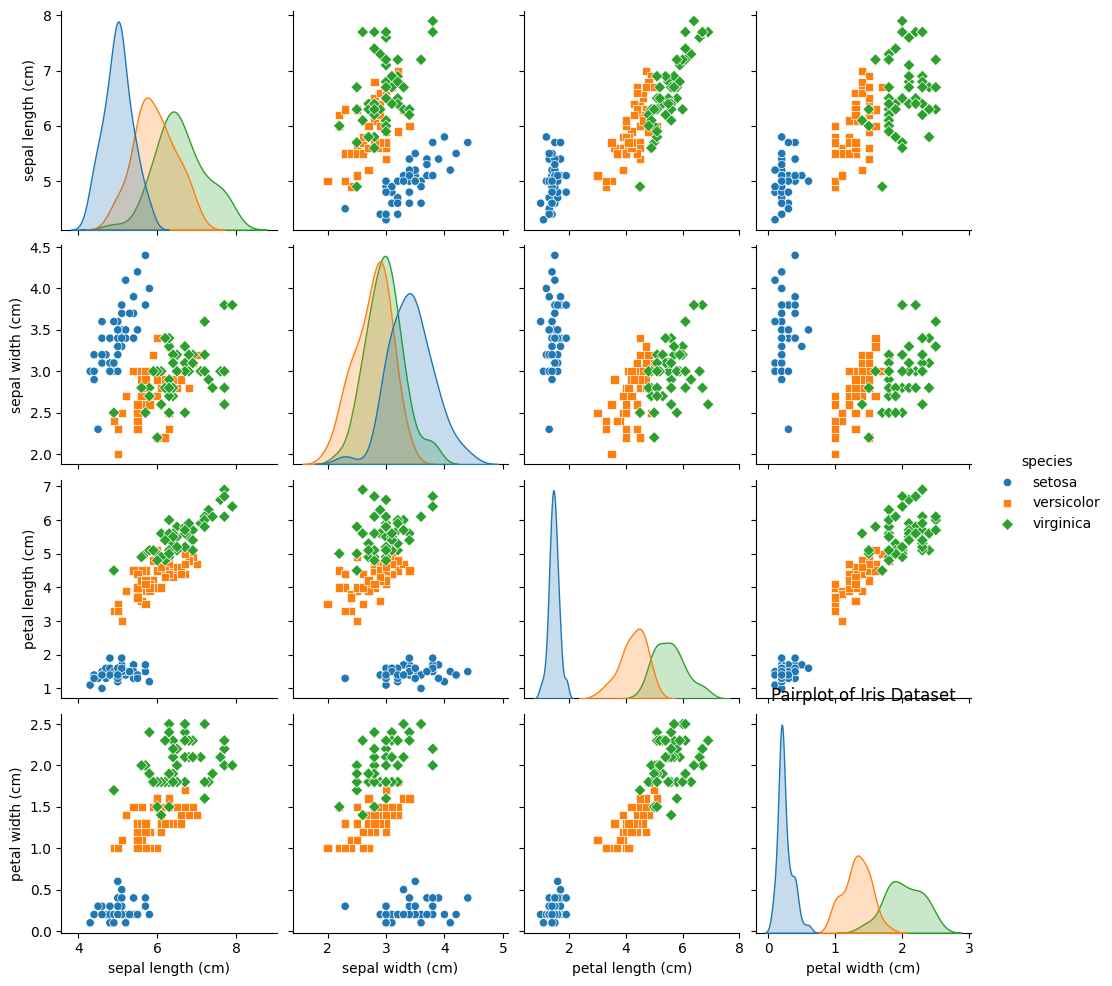

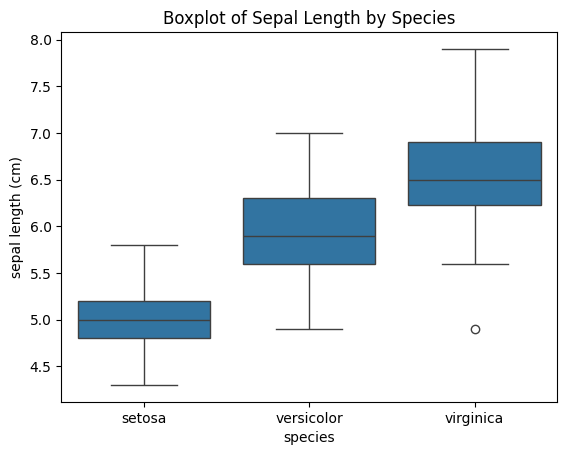

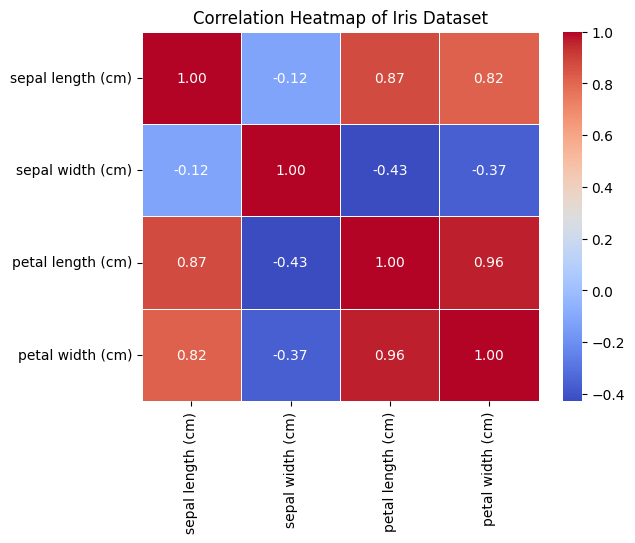


Accuracy of RandomForestClassifier on Iris dataset: 1.00


In [9]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("First 5 rows of the dataset:")
print(df.head())

sns.pairplot(df, hue='species', diag_kind='kde')

plt.title('Pairplot of Iris Dataset')
plt.show()

X=df.drop('species', axis=1)
y=df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train, palette='Set1',s=100,alpha=0.6)

sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test, palette='Set2',marker='x',s=100,alpha=0.8)

sns.pairplot(df, hue='species', markers=["o","s","D"])
plt.title("Pairplot of Iris Dataset", y=1.02) # Changed 'subtitle' to 'title' and adjusted the y-coordinate to position it like a subtitle
plt.show()

sns.boxplot(x='species', y='sepal length (cm)', data=df) # Replace 'iris' with 'df'
plt.title('Boxplot of Sepal Length by Species')
plt.show()

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

X = df.drop(columns=['species'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of RandomForestClassifier on Iris dataset: {accuracy:.2f}")